# 분류기로서의 DNN

In [12]:
%tensorflow_version 1.x


TensorFlow is already loaded. Please restart the runtime to change versions.


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

# 네모 함수의 학습

특정 영역은 1, 이외의 영역은 0을 출력

1개의 출력 노드를 갖는다.

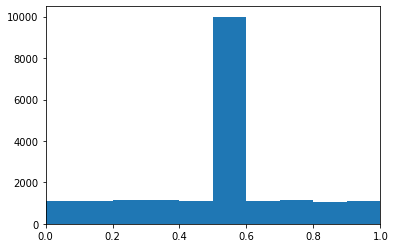

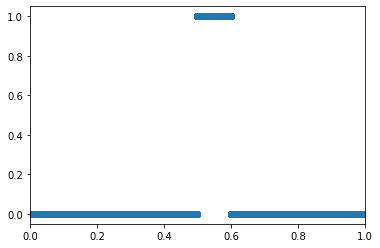

In [3]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Epoch 1/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2513 - val_loss: 0.2500
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 0.2477 - val_loss: 0.2468
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2465 - val_loss: 0.2460
Epoch 4/100
141/141 [==============================] - 0s 1ms/step - loss: 0.2457 - val_loss: 0.2452
Epoch 5/100
141/141 [==============================] - 0s 1ms/step - loss: 0.2449 - val_loss: 0.2444
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 0.2440 - val_loss: 0.2435
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2431 - val_loss: 0.2425
Epoch 8/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2421 - val_loss: 0.2415
Epoch 9/100
141/141 [==============================] - 0s 1ms/step - loss: 0.2410 - val_loss: 0.2403
Epoch 10/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2397 - val_lo

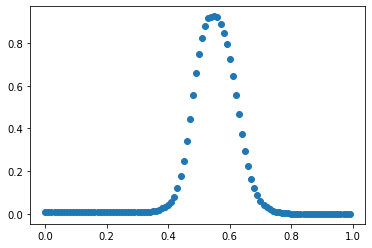

In [5]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

특정 패턴인 경우 1, 다른 경우인 경우 0으로 분류한다.

출력된 값이 0.5보다 크면 1로, 0.5보다 작으면 0으로 간주한다.

# 클래스 2개, 출력 노드 2개

분류 카테고리의 개수 대로 출력노드를 갖고, one-hot-encoding된 값을 출력하면, 변별력이 커진다.

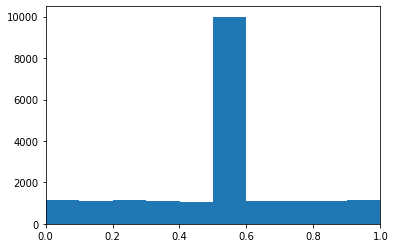

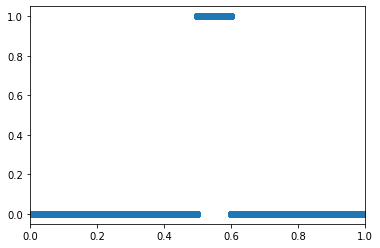

In [6]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

In [8]:
# ADD START
reshaped_y = train_y.reshape((train_y.shape[0],1))
train_y = np.append(reshaped_y, reshaped_y, axis=1)
train_y[:,1] = 1-train_y[:,0]
# ADD END

In [9]:
print(train_y[:10])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2449 - val_loss: 0.2244
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2100 - val_loss: 0.1926
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1713 - val_loss: 0.1453
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1191 - val_loss: 0.0948
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0810 - val_loss: 0.0710
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0671 - val_loss: 0.0630
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0618 - val_loss: 0.0589
Epoch 8/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0585 - val_loss: 0.0566
Epoch 9/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0560 - val_loss: 0.0544
Epoch 10/100
563/563 [==============================] - 1s 1ms/step - loss: 0.0541 - val_lo

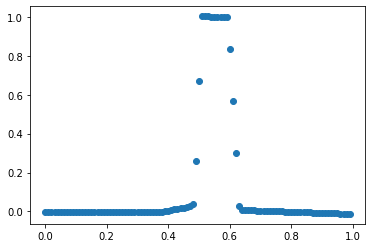

In [7]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_[:,0])

출력 노드의 값은 0과 1이 서로 상반된다.

하지만 이렇게 카테고리 개수 만큼 출력 노드가 있는 경우, 카테고리를 2개 이상으로 해도 처리가 가능해 진다.

# 클래스 4개, 출력 노드 4개

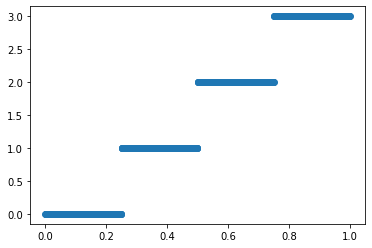

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [10]:
train_x = np.arange(0, 1, 0.001)

class_index = np.zeros_like(train_x, dtype=np.int)
class_index[:250] = 0
class_index[250:500] = 1
class_index[500:750] = 2
class_index[750:] = 3


plt.scatter(train_x, class_index)
plt.show()

train_y = np.zeros((1000, 4))
train_y[np.arange(1000), class_index] = 1 # one-hot 인코딩

print(train_y[245:255])

Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1886 - val_loss: 0.2223
Epoch 2/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1754 - val_loss: 0.2130
Epoch 3/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1657 - val_loss: 0.2062
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1514 - val_loss: 0.1911
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1377 - val_loss: 0.1784
Epoch 6/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1297 - val_loss: 0.1807
Epoch 7/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1264 - val_loss: 0.1763
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1242 - val_loss: 0.1814
Epoch 9/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1226 - val_loss: 0.1764
Epoch 10/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1207 - val_lo

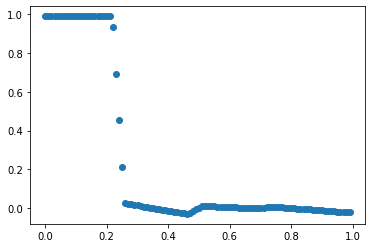

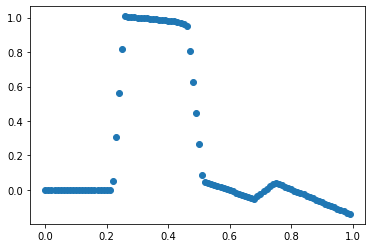

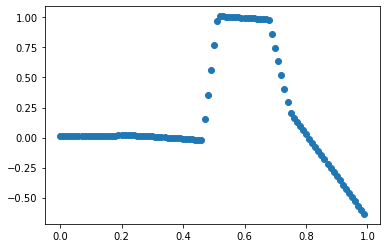

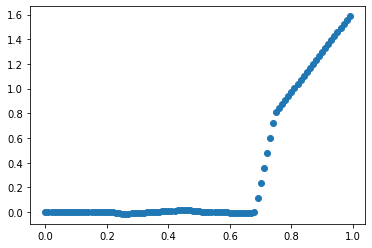

In [11]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=1, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
for i in range(4):
  plt.scatter(x_, y_[:,i])
  plt.show()
